#              Admission Prediction Using Multiple Linnear Regression


     The data contains information about 500 potential students to get admission in Master's programs of any university. The university observe certain parameters to determine their acceptance. 


# Feature Description :

# Importing Libraries

In [45]:
# Data structure analysis
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Linear model library for linear regression
from sklearn.linear_model import LinearRegression

# Data pre-processing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# To ignore future related warning
import warnings
warnings.simplefilter("ignore")


#Library to import final model
import pickle 


# Importing Data from local

In [2]:
data=pd.read_csv("../input/Admission-Prediction.csv")

# TO check first five records
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [77]:
data.shape #(Rows,Columns)

(500, 8)

# Exploratory Data Analysis

In [3]:
# We use describe method to get overview of data for mean,Standard deviation, five number summary and null values (if any)

data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
# Since GRE Score and TOEFL Score are continuous data we will replace null with mean value

data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mean())

In [7]:
#For University Rating
data['University Rating'].unique()

array([ 4.,  3.,  2.,  5., nan,  1.])

In [8]:
#As we can see above University Rating is categorical (ordinal) data we will replace null with most frequent value using MODE

data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])

In [ ]:
# Serial No. column represent the sequence of the record we can remove it

data=data.drop(columns='Serial No.')

In [26]:
# Data after featture engineering

print("-"*25+" Modified data description"+"-"*25,"\n")

print(data.describe())

print("\n","\n","-"*25+"Modified data"+"-"*25,"\n")

print(data.head())

------------------------- Modified data description------------------------- 

        GRE Score  TOEFL Score  University Rating         SOP        LOR  \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.558763   107.187755           3.118000    3.374000    3.48400   
std     11.103952     6.051338           1.128993    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    309.000000   103.000000           2.000000    2.500000    3.00000   
50%    316.558763   107.000000           3.000000    3.500000    3.50000   
75%    324.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit  
count  500.000000  500.000000        500.00000  
mean     8.576440    0.560000          0.72174  
std      0.604813    0.496884          0.14114  
min      6.800000    0.000000          0

# Data Visualization

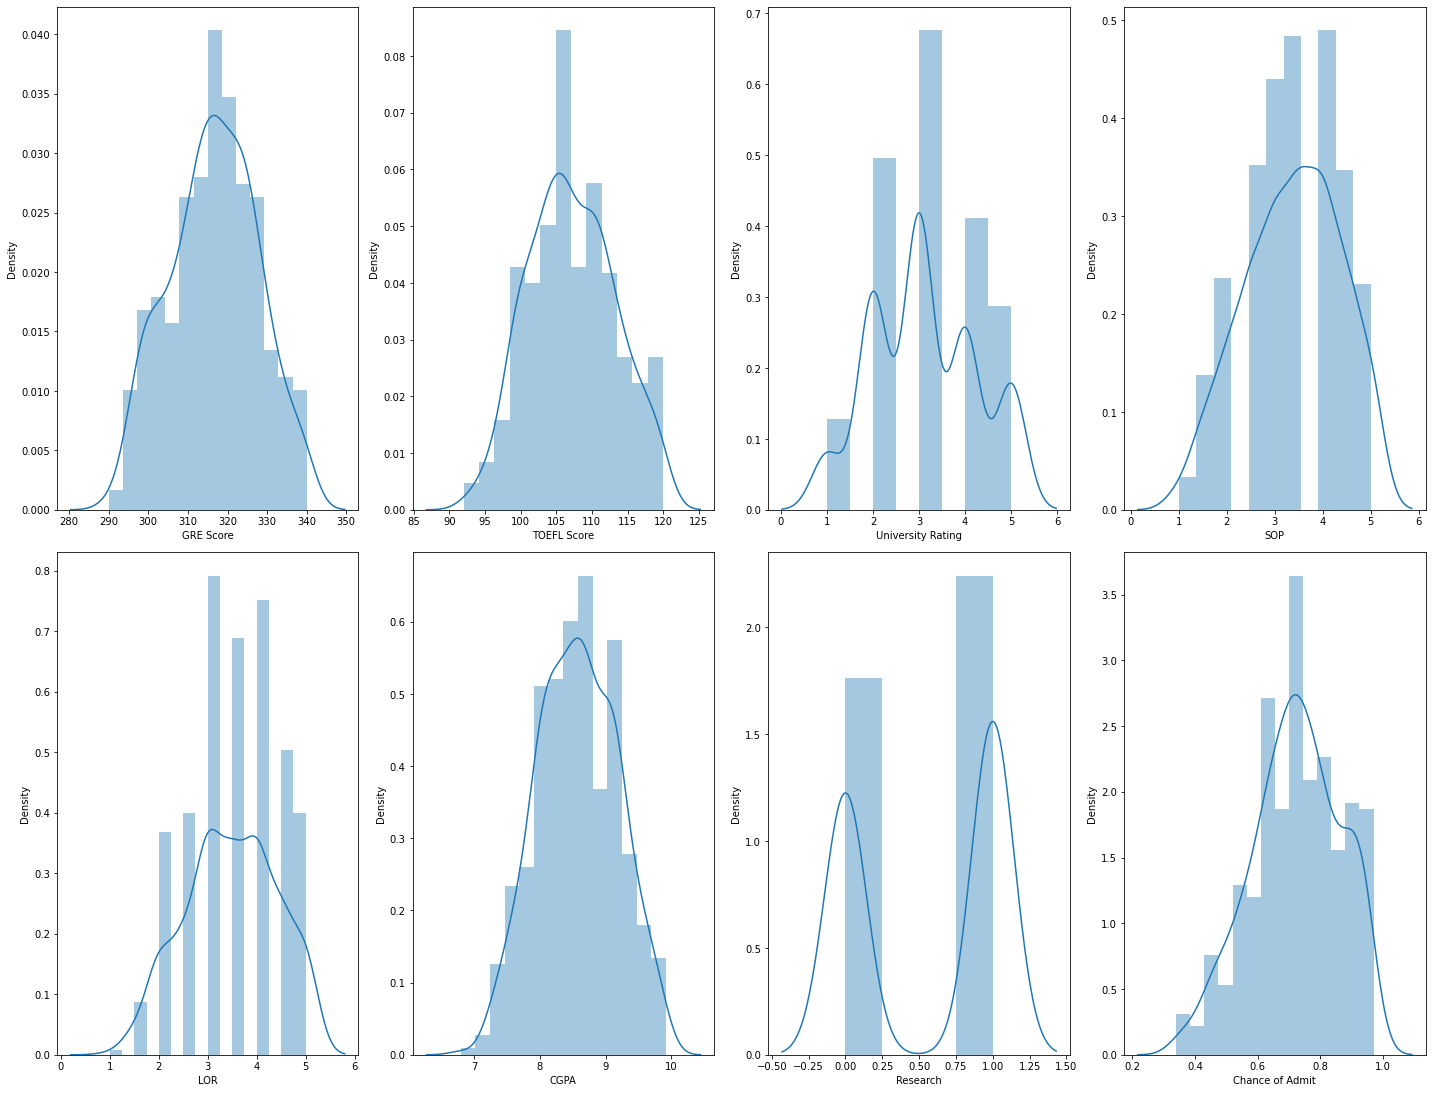

In [46]:
# Now we will check for the distribution of all the features to detect outlier

plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber <= 16:
        plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()  

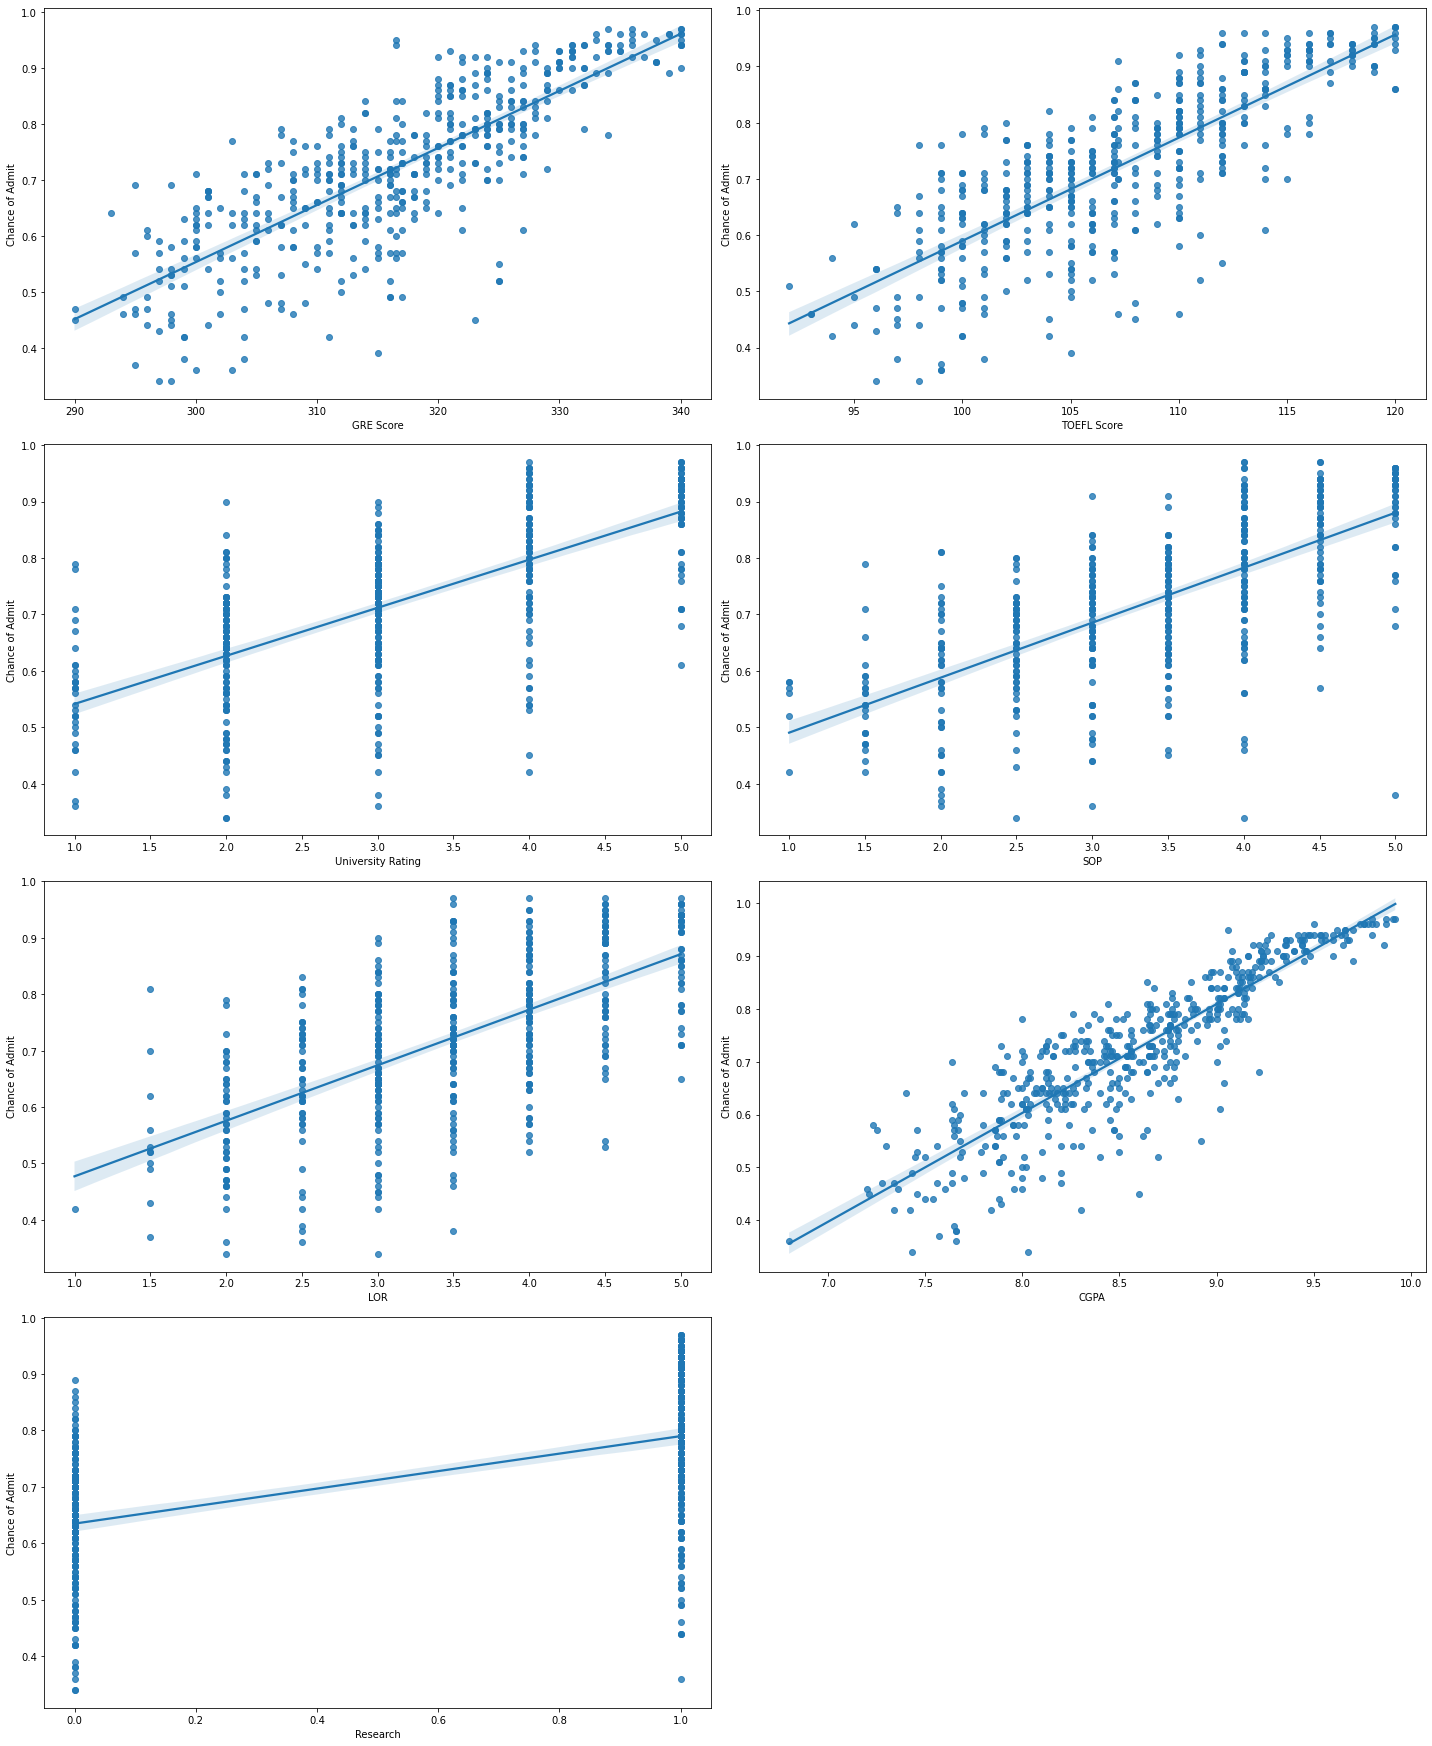

In [54]:
# Regression plot to check linearity of outcome w.r.t. all the features

plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber <= 7:
        plt.subplot(5,2,plotnumber)
        sns.regplot(data[column],data['Chance of Admit'])
        plt.xlabel(column)
        plt.ylabel('Chance of Admit')
    plotnumber+=1
plt.tight_layout()  

<AxesSubplot:>

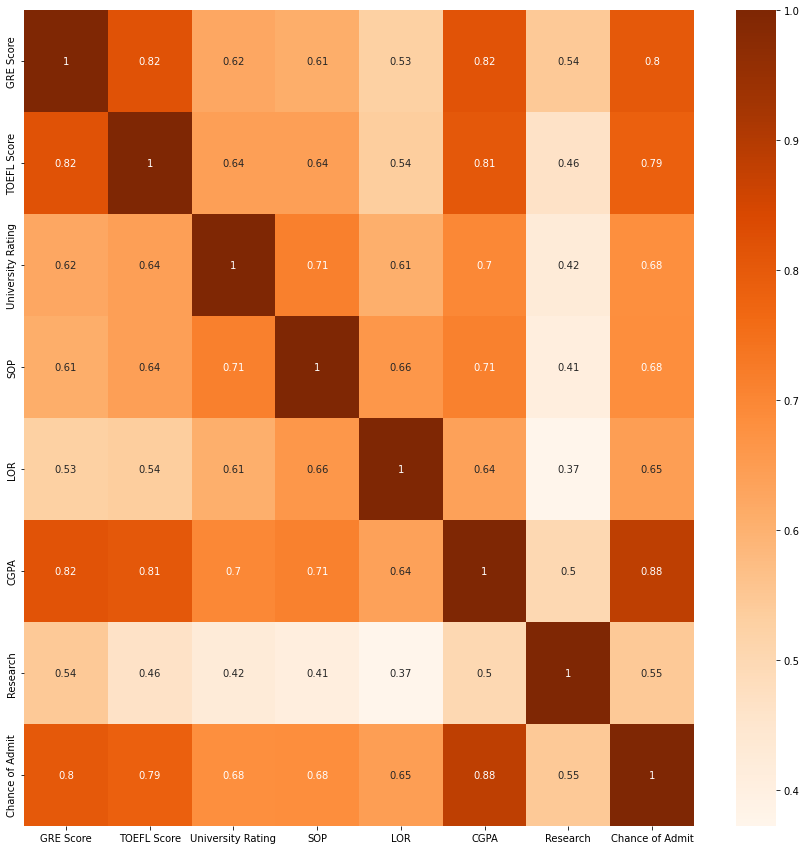

In [38]:
#To check collinearity of all the features against chance of admit

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap='Oranges')

# Data Preprocessing

In [55]:
# Separate the features and outcome columns in x and y respectively

y=data['Chance of Admit']
x=data.drop(columns='Chance of Admit')

In [56]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0


In [57]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [58]:
# Now we will perform scaling of the features between (0,1) for accurate prediction

# We will use StandardScaler method

scalar=StandardScaler()
X_scale=scalar.fit_transform(x)

In [62]:
# Split the data using train test split. We will use train_test_split method to split data into 25:75 ratio with random state of 42

x_train,x_test,y_train,y_test=train_test_split(X_scale,y,test_size=0.25,random_state=42)

# Apply Machine Learning Algoritham

In [74]:
# Linear regression 

linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_predict = linreg.predict(x_test)

print("*"*15+" Regression score for training data "+"*"*15,"\n")

print(linreg.score(x_train,y_train)*100,"%","\n")

print("*"*15+" Regression score for test data "+"*"*15,"\n")

print(linreg.score(x_test,y_test)*100,"%")

*************** Regression score for training data *************** 

82.05681087702013 % 

*************** Regression score for test data *************** 

81.75156689543607 %


In [4]:
#Saving the model

import joblib

In [ ]:
 # model - linreg , filename-admission_pred.pkl

joblib.dump(linreg,'admission_pred.pkl')